# Simulated annealing

This section will briefly explain the <i>simulated annealing</i> algorithm. This is an optimization algorithm that is mostly used for discrete problems, but can be used more generally. It can be combined with other optimization algorithms to help avoid being trapped in local optima.

The algorithm relies on a <i>temperature</i> $T$. This is not a physical temperature, but rather a variable that describes how much you are allowed to move in the "wrong direction", i.e., away from the optimum you are searching. However, the algorithm, including its name, originates from physical processes of heat treatment, where the physical and chemical properties of materials change with changing temperature and the speed of heating/cooling.

Assume we have an objective function $f \colon S \to \mathbb{R}$. Here, $S$ is a space of possible states $s$. As we are often working with discrete problems, we say that the space we are working in is a space consists of states, and not a subspace of the space of real numbers. 

The algorithm is iterative, and we start with our counter $k=0$, and initiate with a state $s_0$. For each iteration $k$ we set the temperature $T$ to
\begin{equation}
T=1-\frac{k+1}{k_m}
\end{equation}
where $k_m$ is the maximum number of iterations (in our typical Python world, we start counting at 0, and end counting at $k_m-1$, i.e., we exclude the maximum number of iterations). Note that the temperature goes towards zero from above, as the fraction starts with a small number and will go closer and closer to 1.

Pick a test-state $s_n$ according to your chosen algorithm. This could be chosen by a similar technique as all the other optimization algorithms we have considered, or just a random perturbation of the state $s$.

We now either choose the new test state $s_n$ or keep the old state $s$ by a probability that depends on the difference in objective functions $f(s_n) - f(s)$ and the temperature. The better the objective for the test candidate $s_n$ compared to $s$, the more likely it is should be to shift from $s$  to $s_n$. The higher the temperature, the more likely we are to do a random shift.

A common acceptance probability function $P(s,s_n,T)$ is given as
\begin{equation}
 P(s,s_n,T) = 
 \begin{cases}
 1 & \text{ if } f(s_n)<f(s) \\
 e^{-\frac{f(s_n)-f(s)}{T}} & \text{ if } f(s_n) \geq f(s)
 \end{cases}
\end{equation}
and we let $s=s_n$ if $P(s,s_n,T)$ is larger than a random number between 0 and 1.


## Example

To illustrate the simulated annealing algorithm, we will try it out on a fairly simple function. Assume an objective function of type 
\begin{equation}
 f(x) = \cos(x)+0.2\sin(10x)
\end{equation}
where $x \in [0,2\pi]$. This function has a global minimum and several local minima. Use random motion and simulated annealing to find the minima of this function.


3.0518173626669354


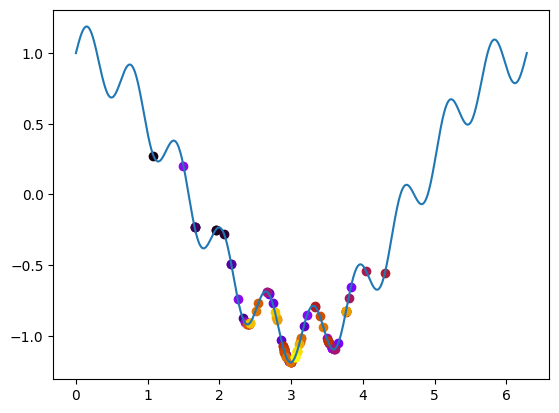

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

cmap = plt.get_cmap('gnuplot')

def objectiveFunction(x):
    return np.cos(x)+0.2*np.sin(10*x)

def temperature(ii,iMaxIt):
    return (iMaxIt-ii)/iMaxIt

afx=np.linspace(0,2*np.pi,1000)

plt.plot(afx,objectiveFunction(afx))

def simAnnealing(fStartPoint,fStepSize,iMaxIt):
    fCurrentPoint=fStartPoint
    for ii in range(0,iMaxIt):
        fNextPoint=fCurrentPoint+np.random.uniform(-fStepSize,fStepSize)
        if objectiveFunction(fNextPoint)<objectiveFunction(fCurrentPoint):
            fCurrentPoint=fNextPoint
        else:
            fPropability=np.exp(-(objectiveFunction(fNextPoint)-objectiveFunction(fCurrentPoint))/temperature(ii,iMaxIt))
            if fPropability>np.random.uniform(0,1):
                fCurrentPoint=fNextPoint
        # Ensure we are within the outer bounds
        if fCurrentPoint<0:
            fCurrentPoint=0
        if fCurrentPoint>2*np.pi:
            fCurrentPoint=2*np.pi
        plt.scatter(fCurrentPoint,objectiveFunction(fCurrentPoint),color=cmap(ii/iMaxIt))
        
    return fCurrentPoint

fBestPoint=simAnnealing(1.0,1.0,100)
print(fBestPoint)
plt.show()


## Example

Below is a slightly more advanced example, where we will use the simulated annealing algorithm to find the shortest path between a set of points $\{\vec{x}\} = \{\vec{x}_0, \vec{x}_1, \cdots, \vec{x}_n \}$. The objective function is then the path length for the given ordering of the set of points:
\begin{equation}
 f(\{\vec{x}\}) = \sum_i \vert \vec{x}_{i+1} - \vec{x}_i \vert
 \end{equation}
To test new possible paths, we randomly shuffle two points within the set of points $\{\vec{x}\}$, thus giving it a new ordering.

Below, we have implemented a simulated annealing algorithm in Python to solve this problem.

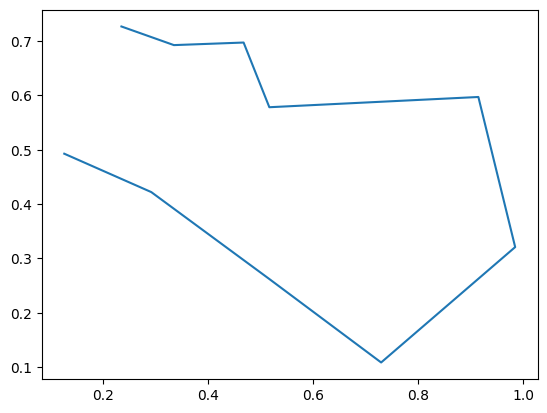

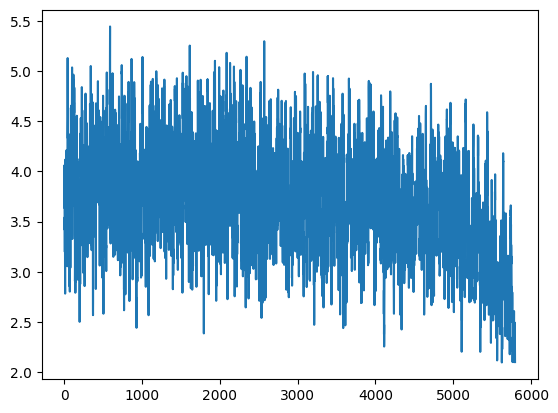

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt


numPoints=10
dimension=2

def startPoint():
    aaPoints=np.random.uniform(0,1,(numPoints,dimension))
    return aaPoints

def objectiveFunction(aaPoints):
    obj=0.0
    for ii in range(numPoints-1):
        curVal=0.0
        for jj in range(dimension):
            curVal+=(aaPoints[ii+1,jj]-aaPoints[ii,jj])**2
        obj+=np.sqrt(curVal)
    return obj


def nextPoint(aaPoints):
    aaNewPoints=np.copy(aaPoints)
    sh1=random.randint(0,numPoints-1)
    sh2=random.randint(0,numPoints-1)
    while sh1==sh2:
        sh2=random.randint(0,numPoints-1)
    tempPoint=np.copy(aaNewPoints[sh1,:])
    aaNewPoints[sh1,:]=np.copy(aaNewPoints[sh2,:])
    aaNewPoints[sh2,:]=np.copy(tempPoint)
    #np.random.shuffle(aaNewPoints)
    return aaNewPoints


def tempFunc(step,maxStep):
    return 1-step/maxStep

def acceptanceFunc(objective,nextObjective,temp):
    # if nextObjective<objective:
    #     returnValue=1
    # else:
    #     returnValue=np.exp(-(nextObjective-objective)/temp)
    return np.exp(-(nextObjective-objective)/temp)


def simulatedAnnealing(startPoint,objectiveFunction,nextPoint,acceptanceFunc,tempFunc,maxSteps):
    state = startPoint()
    objective = objectiveFunction(state)
    states, objectives = [state], [objective]
    for step in range(maxSteps):
        currentTemp = tempFunc(step,maxSteps)
        nextState = nextPoint(state)
        nextObjective = objectiveFunction(nextState)
        randNum=random.random()
        if acceptanceFunc(objective, nextObjective, currentTemp) > randNum:
            # print('Change occuring',objective,nextObjective,acceptanceFunc(objective, nextObjective, currentTemp),randNum)
            # print(state)
            # print(nextState)
            # plt.plot(state[:,0],state[:,1],color='b')
            # plt.plot(nextState[:,0],nextState[:,1],color='r',linestyle='dashed')
            # plt.show()
            state, objective = np.copy(nextState), nextObjective
            states.append(np.copy(state))
            objectives.append(objective)
    return state, objectiveFunction(state), states, objectives


bestState, bestObj, states, objectives = simulatedAnnealing(startPoint,objectiveFunction,nextPoint,acceptanceFunc,tempFunc,maxSteps=10000)

plt.plot(bestState[:,0],bestState[:,1])
plt.show()

plt.plot(objectives)
plt.show()


[Previous note](nelderMead.ipynb) -- [Next note](evolutionaryAlgorithms.ipynb)